# The Perceptron

### The following few portions will be referencing resources mainly from Kilian Weinberger's materials from CS4780 [1].

Invented by Frank Rosenblatt in 1958, the Perceptron is a simple supervised algorithm used for the **binary** classification. For a given dataset of **linearly separable** data points, a separating hyperplane can be obtained. At lower dimensions where data may not be linearly separable, a separating hyperplane may not be obtainable. But at higher dimensions, it is almost always the case that a separating hyperplane can be found.

The hypothesis for the algorithm is as follows:

$$h(x_i) = \textrm{sign}(\mathbf{w}^\top \mathbf{x}_i + b)$$

$\mathbf{w}^\top \mathbf{x}_i + b = 0$ is the equation of the hyperplane, where $\mathbf{w}^\top$ defines the vector normal to the hyperplane, and b is the bias/offset term. Similar to linear regression, the hypothesis can be vectorised to incorporate the bias term into $\mathbf{w}^\top \mathbf{x}_i$ by adding one constant dimension as follows:

$$
\mathbf{x}_i \hspace{0.1in} \to \hspace{0.1in} \begin{bmatrix} \mathbf{x}_i \\ 1  \end{bmatrix} \\
\mathbf{w} \hspace{0.1in} \to \hspace{0.1in} \begin{bmatrix} \mathbf{w} \\ b  \end{bmatrix} \\
$$

The new hypothesis is as follow:

$$h(x_i) = \textrm{sign}(\mathbf{w}^\top \mathbf{x}_i)$$

The 'sign' in the equation represents the side of the hyperplane that a data point belongs to. For examples that are classified as positive, $\mathbf{w}^\top \mathbf{x}_i > 0$. For negative examples, $\mathbf{w}^\top \mathbf{x}_i < 0$.

Given that label $y$ can only take on $+1$ or $-1$ in the case of binary classification, it is observed that for a data point to be classified correctly, 

$$y_i(\mathbf{w}^\top \mathbf{x}_i) > 0$$

For instance, a positive example ($y = +1$) that is also classified as positive ($\mathbf{w}^\top \mathbf{x}_i > 0$) will result in the above equation holding true. If that positive example is classified wrongly as negative ($\mathbf{w}^\top \mathbf{x}_i < 0$), then $y_i(\mathbf{w}^\top \mathbf{x}_i) \leq 0$. The same observation holds for a negative example ($y = -1$).

For a separable hyperplane $y_i(\mathbf{w}^\top \mathbf{x}_i) > 0$ holds true for every data point. This also means that there exist at least another separable hyperplanes where $k * y_i(\mathbf{w}^\top \mathbf{x}_i) > 0$ holds true for every data point, where $k > 0$. In view of this, it is shown that if a separable hyperplane can be found, there are infinitely many separating hyperplanes.

Text(0.5, 1.0, 'Linearly-separable data points')

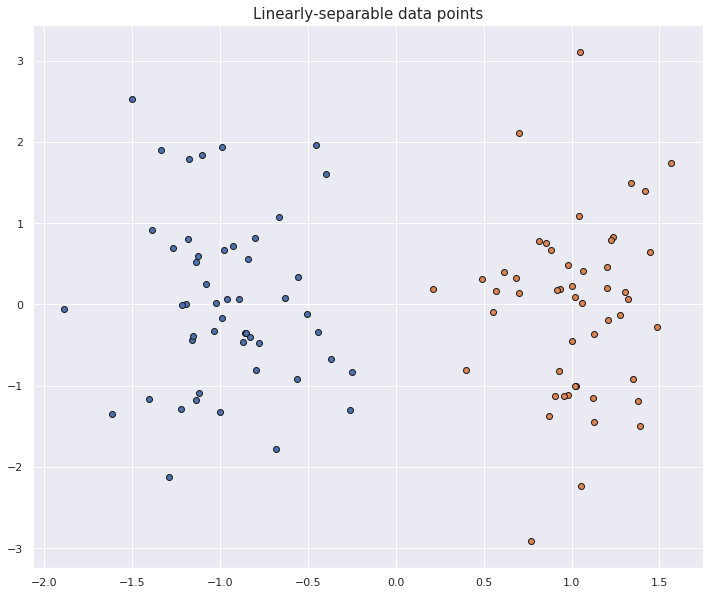

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification

fig, ax = plt.subplots(figsize=(12, 10))
sns.set(style = "darkgrid")

separable = False
while not separable:
    X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    
    #Just to make negative y-labels -1 instead of 0
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = -1
        
            
    negative = X[:][y == -1] #Take features from samples that have label -1 only.
    positive = X[:][y == 1] #Take features samples that have label 1 only
    
    #For feature 1 and 2:
        #Check if red values are strictly less than blue values, or blue values are strictly less than red values
        #any() checks if any of the conditions are met
            #If at least one condition is True, separable is True and loop breaks; else repeat loop
    
    #Resultant graph will be linearly separable
    
    #General check 
    #separable = any([negative[:, k].max() < positive[:, k].min() or negative[:, k].min() > positive[:, k].max() for k in range(2)])
    
    #If we want max and min of different groups to fall within a specific range, we can define upper and lower bound
    upper = 0.5
    lower = 0.10
    separable = any([lower < negative[:, k].min() - positive[:, k].max() < upper  or  lower < positive[:, k].min() - negative[:, k].max() < upper for k in range(2)])
    
plt.scatter(x=negative[:, 0], y=negative[:, 1], edgecolor='k', linewidth=1, label='y = -1')
plt.scatter(x=positive[:, 0], y=positive[:, 1], edgecolor='k', linewidth=1, label='y = +1')
ax.set_title('Linearly-separable data points', fontsize=15)

## Algorithm

Given that the goal of the Perceptron algorithm is to find a separating hyperplane, it needs to find a $\mathbf{w}$ such that the data can be linearly separable.

The algorithm is as follows:

1. $\text{Initialise } \mathbf{w} = 0.$ &emsp;&emsp;$\text{// This results in } \mathbf{w}^\top \mathbf{x}_i = 0$


2. $\text{While TRUE:}$

    &emsp;$\text{Set the number of misclassifications }m = 0$

    &emsp;$\text{For every (data, label) pair in the dataset:}$

   &emsp;&emsp;$\text{If }y_i(\mathbf{w}^\top \mathbf{x}_i) \leq 0:$ &emsp;&emsp;&emsp;$\text{// If data point is misclassified}$
   
   &emsp;&emsp;&emsp;&emsp;$\mathbf{w}\gets\mathbf{w}+y\mathbf{x}$ &emsp;&emsp;&emsp;$\text{ // Update }\mathbf{w} \text{ via vector addition or subtraction}$
   
   &emsp;&emsp;&emsp;&emsp;$m\gets m+1$ &emsp;&emsp;&emsp;$\text{ // Increment } m \text{ by } 1$ 
   
   &emsp;$\text{If }m=0:$ &emsp;&emsp;&emsp;$\text{ // If most recent } \mathbf{w} \text{ gave 0 misclassifications after going through all pairs of (data, label)}$
   
   &emsp;&emsp;&emsp;$\text{break}$ &emsp;&emsp;&emsp;$\text{ // Separating hyperplane found}$ 
      

In [26]:
class Perceptron:
    
    def fit(self, X, y):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        
        #Initialise weights to zero
        #Shape should take on X column
        self.w = np.zeros(X.shape[1])
        
        #Monitor number of iterations
        self.n_iter = 0
        
        while True:
            
            m = 0 #Number of misclassifications set to 0
            
            for i in range(len(y)):
                if y[i] * (self.w.T.dot(X[i])) <= 0: #Misclassified
                    self.w += y[i] * X[i] #Update weights
                    m += 1 #Increment m by 1
                
            if m == 0:
                break
            
            self.n_iter += 1
        
        self.w = np.expand_dims(self.w, axis=1)
                
    
    def predict(self, X):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        
        arr = np.squeeze(X.dot(self.w))
        
        #For each data point in X, [x > 0] returns 0 or 1 correspond to False or True if it is larger than 0
        #0 or 1 will be used to obtain index from [-1, 1] to give it its label
        return [[-1, 1][x > 0] for x in arr]

In [27]:
model = Perceptron()
model.fit(X, y)

In [28]:
model.predict(X)
print("Number of iterations: ", model.n_iter)

Number of iterations:  1


<ipython-input-26-6843c1dfb0dd>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return [[-1, 1][x > 0] for x in arr]


In [29]:
w = np.squeeze(model.w)
b = model.w[0][0]
w1 = model.w[1][0]
w2 = model.w[2][0]
print("w1: ", w1)
print("w2: ", w2)
print("b: ", b)

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

print("Intercept: ", c)
print("Slope: ", m)

w1:  2.357675674746508
w2:  -0.3564468694815366
b:  0.0
Intercept:  0.0
Slope:  6.614381767963969


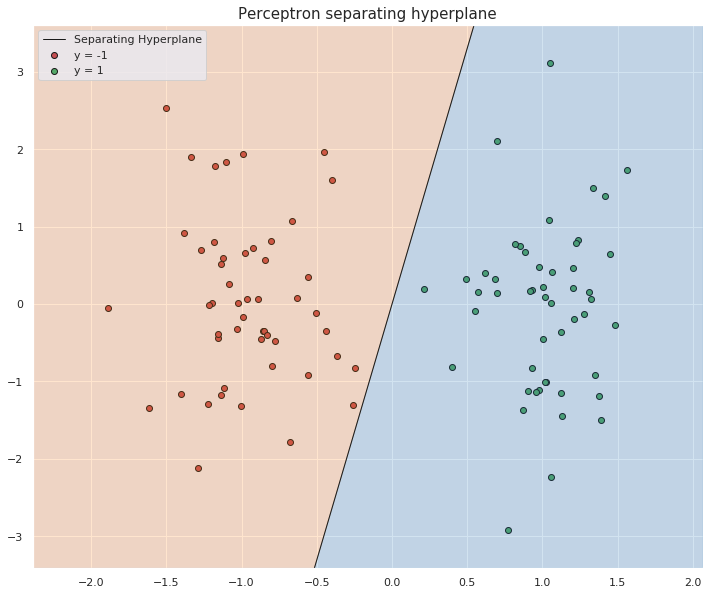

In [30]:
# Plot the decision boundary [2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

x_range = np.array([x_min, x_max])
y_pred = m*x_range + c

plt.figure(1, figsize=(12, 10))


# Plot also the training points
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='r', edgecolor='k', linewidth=1, label='y = -1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='g', edgecolor='k', linewidth=1, label='y = 1')
plt.plot(x_range, y_pred, color = 'k', linewidth=1, label='Separating Hyperplane')
plt.fill_between(x_range, y_pred, y_min, color='tab:blue', alpha=0.2)
plt.fill_between(x_range, y_pred, y_max, color='tab:orange', alpha=0.2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title('Perceptron separating hyperplane', fontsize=15)


plt.legend()

## Convergence Proof

For data that is linearly separable, it can be proven the number of updates to $\mathbf{w}$ is upper bounded by $\frac{1}{\gamma^2}$, where $\gamma$ represents the distance from the separating hyperplane to the closest data point, or the margin of the hyperplane.

This means that the Perceptron algorithm will perform at most $\frac{1}{\gamma^2}$ updates before convergence; it will make at most $\frac{1}{\gamma^2}$ misclassifcations.

The full proof of the convergence is shown in [1].

This upper bound is a bit intuitive as the convergence should take more iterations if the closest data point is very near to the separating hyperplane (small $\gamma$). If the closest distance between data point of a positive example and a negative example is very large, it would seem likely that $\gamma$ is also large, and that it may take fewer iterations for convergence. Increasing the difference between the upper and lower bounds when generating the data in the first code cell can increase the probability of observing such an event.

### References
[1] CS4780/CS5780: Machine Learning for Intelligent Systems. Kilian Weinberger, 2017. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html

[2] Plotting the decision boundary of a logistic regression model. christian, 2020. https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/